In [15]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# from scipy import signal
# from matplotlib import ticker
# from scipy.stats import spearmanr

# import os
# plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
# mpl.rcParams['axes.unicode_minus']=False

# from WindPy import w  # 第一步：导入 WindPy 模块
# w.start() # 第二步：启动 API 接口

.ErrorCode=0
.Data=[Already conntected!]

In [16]:
# data = pd.read_csv('./data/中信一级行业涨跌幅成交金额.CSV', encoding= 'gbk', usecols= range(1, 6))
# data['日期'] = pd.DatetimeIndex(data['日期'])
# # groupby 的奇怪问题，赋值前记得 sort
# data = data.sort_values(['简称', '日期'], ignore_index= True)
# data_month = pd.read_csv('./data/中信一级涨跌幅序列month.CSV', encoding= 'gbk', usecols= range(1, 4))
# data_month['日期'] = pd.DatetimeIndex(data_month['日期'])
# data['indexRetToVolume'] = data['涨跌幅(%)']/ data['成交金额(元)'] * 10**12

In [17]:
# data['VolumeMom'] = (data.groupby('简称')['indexRetToVolume'].rolling(120).mean()/data.groupby('简称')['indexRetToVolume'].rolling(120).std()).values

In [18]:
# data = data.dropna().reset_index(drop = True)

按月回测的例子

In [19]:
# DataTable = pd.merge(data_month.set_index(['简称', '日期']), data[['简称', '日期', 'VolumeMom', '收盘价']].set_index(['简称', '日期']), left_index= True, right_index= True)

In [20]:
# DataTable

涨跌幅(%)  VolumeMom        收盘价
简称       日期                                       
石油石化(中信) 2010-07-30  10.7936  -0.093179  2043.4536
         2010-08-31   0.2548  -0.107415  2048.6606
         2010-09-30   1.2089  -0.115168  2073.4263
         2010-10-29  11.5198  -0.061987  2312.2805
         2010-11-30   3.5213   0.014448  2393.7039
...                      ...        ...        ...
综合金融(中信) 2023-05-31  -0.5188  -0.023170   697.4189
         2023-06-30  -0.7270  -0.021580   692.3484
         2023-07-31   9.7138  -0.018047   759.6015
         2023-08-31  -6.5908  -0.078875   709.5378
         2023-09-19  -1.6867  -0.095466   697.5701

[4651 rows x 3 columns]

In [13]:
# zhongzheng_all = w.wsd("000985.CSI", "pct_chg", "2012-01-01", "2023-09-22", "Period=M", usedf=True)[1]
# zhongzheng_all.index = pd.DatetimeIndex(zhongzheng_all.index)

In [41]:
# N = 5
# fname = 'VolumeMom'
# start = 0
# last_trade_date = sorted(list(set(DataTable.index.levels[1])))
# result_df = pd.DataFrame()

# timestamp = list()
# rankic = pd.Series()
# portfolio = np.array([1] * N).reshape(N, 1)

# for i in range(29, len(last_trade_date) - 1):
#     factorData = DataTable.query('日期 == "' +  str(last_trade_date[i])  +  '"')[fname]
#     factorData.index = factorData.index.droplevel(1)
#     cutRes = pd.qcut(factorData, N, labels = np.arange(1, N + 1))

#     # temp 的 index 为代码，columns 为时间
#     temp = 1 + DataTable[['涨跌幅(%)']].loc[cutRes.index].query('日期 == "' +  str(last_trade_date[i + 1])  +  '"')/100
#     temp.index = temp.index.droplevel(1)
#     rankic[last_trade_date[i]] = spearmanr(factorData, temp).correlation
#     # 广播 portfolio 最后一列的值
#     ls = temp.groupby(cutRes).mean() * portfolio[:, -1].reshape(N, 1)
#     zzmkt = (1 + zhongzheng_all.loc[last_trade_date[i]]/100)
#     # 结果记录
#     temp_df = pd.concat([factorData[cutRes == N], temp[cutRes == N] - 1, temp[cutRes == N].T.iloc[-1] - zzmkt.values], axis = 1)
#     temp_df.columns = ['因子值', '持有期收益', '持有期超额收益']
#     temp_df['日期'] = last_trade_date[i]
#     result_df = pd.concat([result_df, temp_df])

    
#     portfolio = np.hstack((portfolio, ls.values))  
#     portfolio = pd.DataFrame(portfolio).fillna(method='pad', axis = 1)
#     portfolio = np.array(portfolio)
#     timestamp.append(last_trade_date[i + 1])

<ipython-input-41-6758e42bc040>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rankic = pd.Series()


In [43]:
# result_df = result_df.sort_values(['日期', '因子值'], ascending=[True, False]).reset_index().set_index(['日期', '简称'])

In [44]:
# result_df.to_excel('./output/成交量调节动量_5group.xlsx')

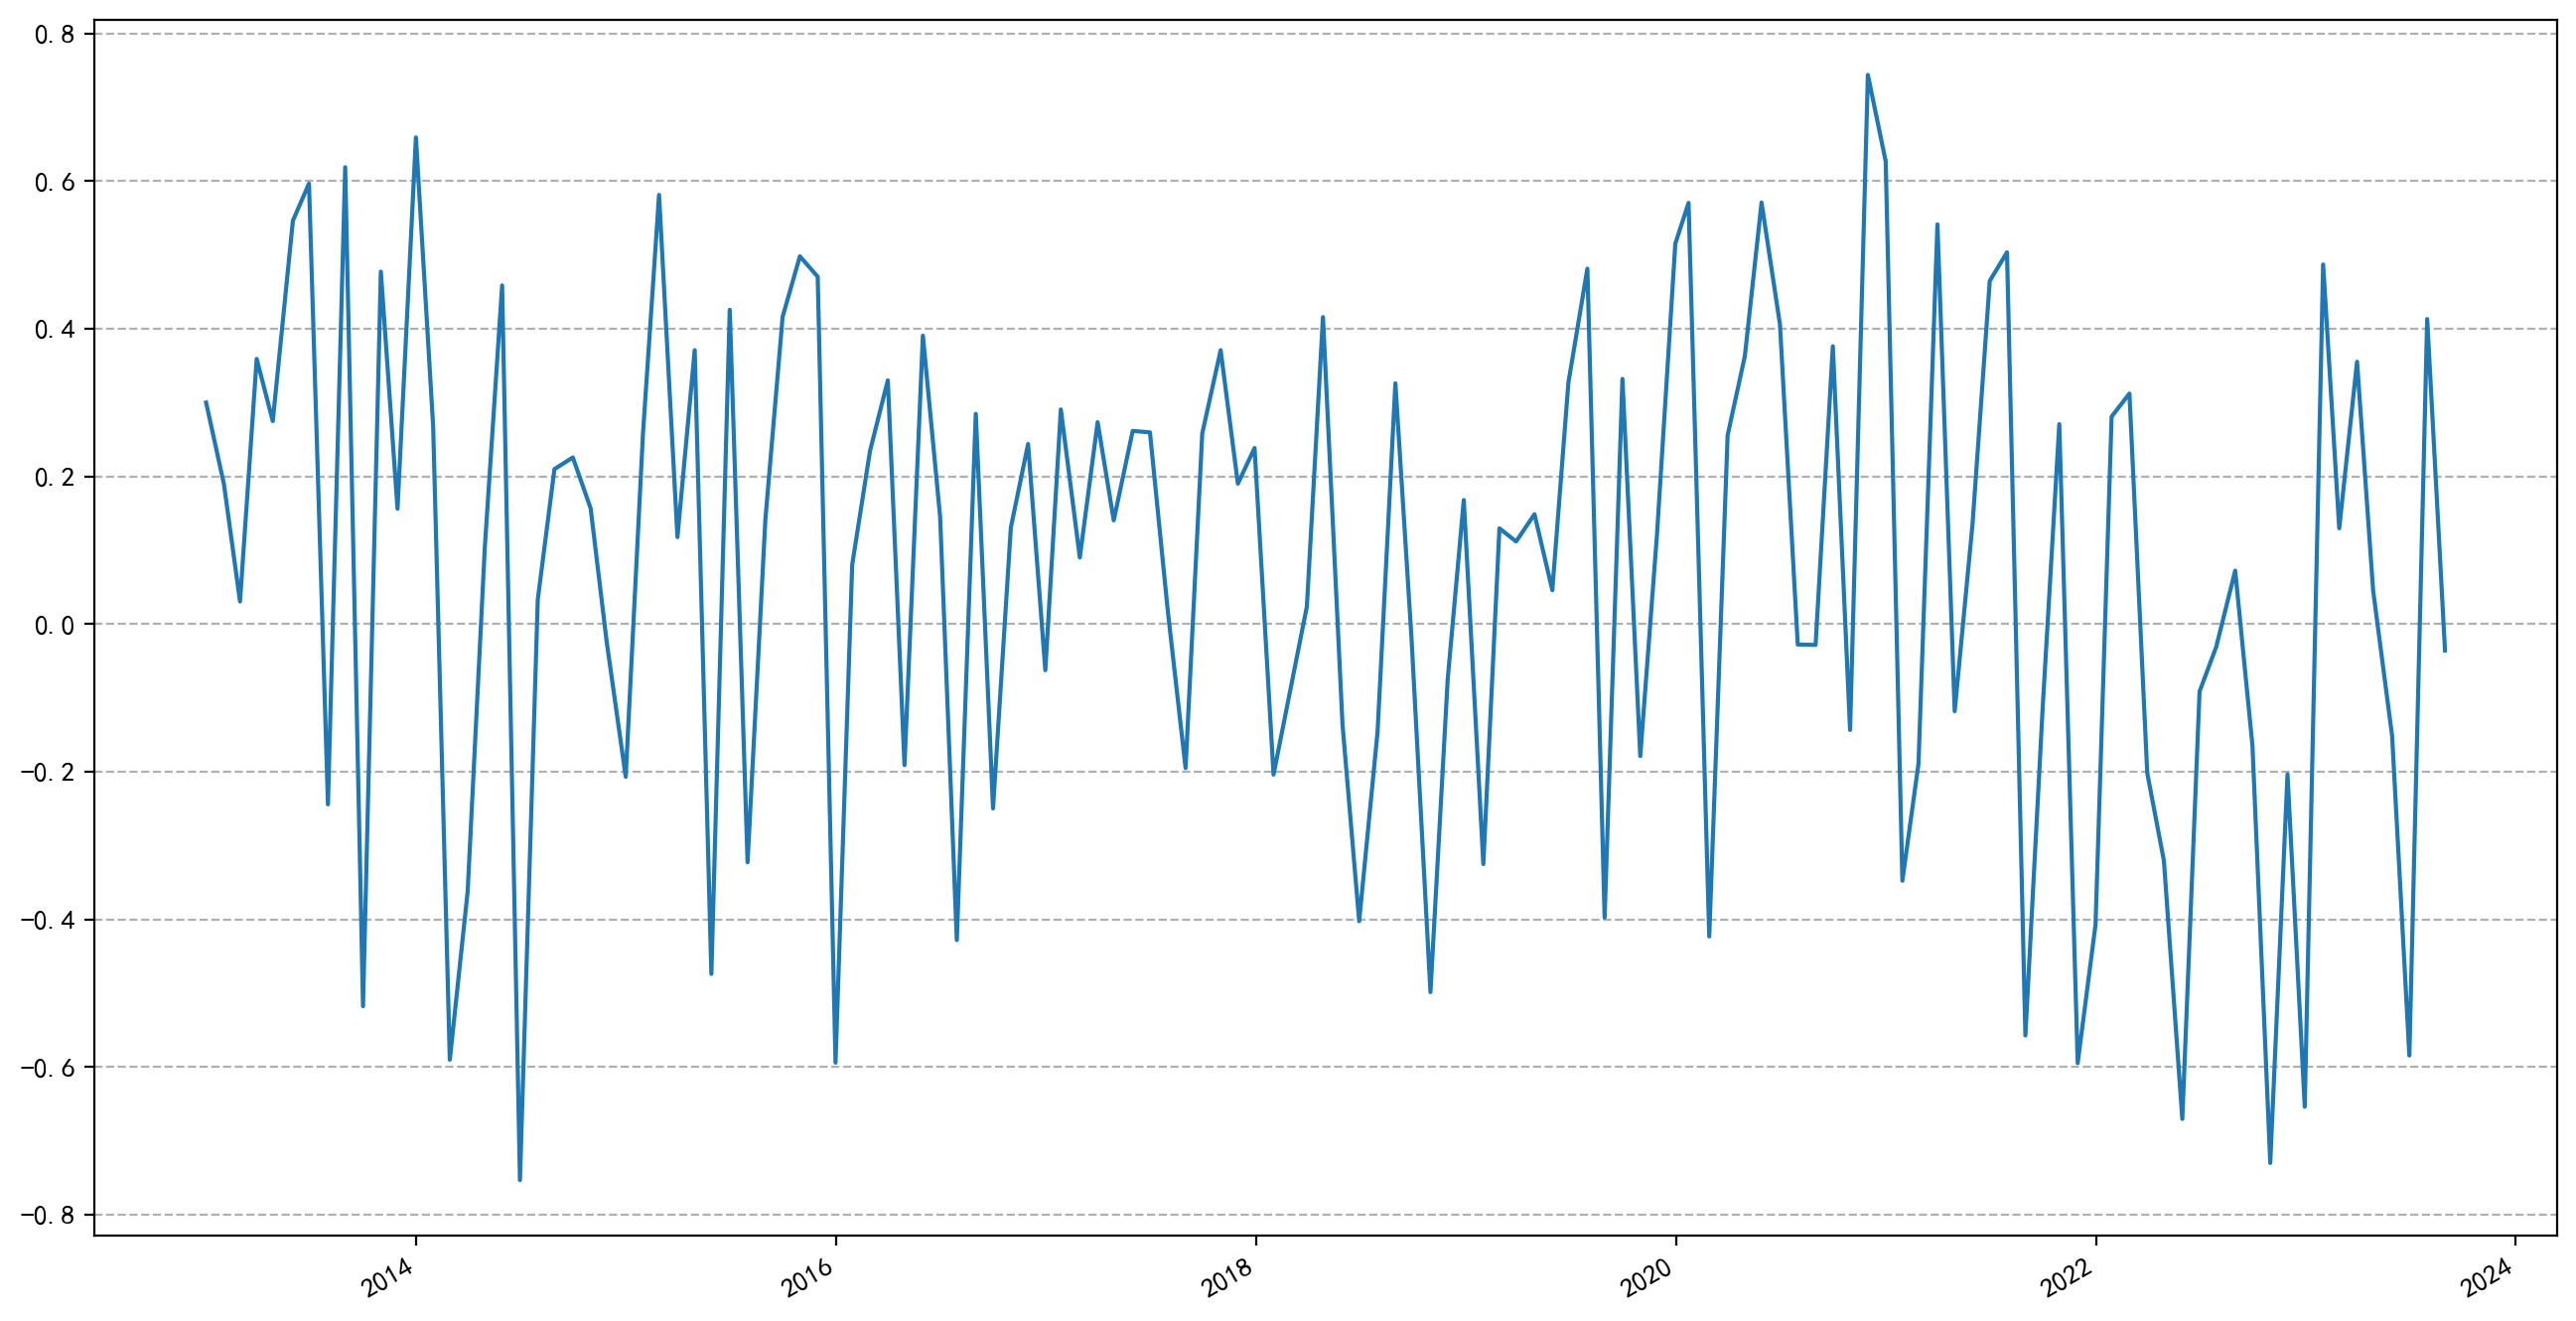

In [12]:
# fig, ax = plt.subplots(figsize = (16, 9), dpi = 200)
# rankic.plot(ax = ax)
# ax.grid(axis = 'y', linestyle='--')

In [13]:
# print('月胜率：', sum(np.diff(portfolio[-1]) > 0)/ len(portfolio[-1]))
# print('RankIC均值：', rankic.mean())

月胜率： 0.6
RankIC均值： 0.07567790962518957


In [16]:
# rankic['2022-01-01':].mean()

-0.0871412680756396

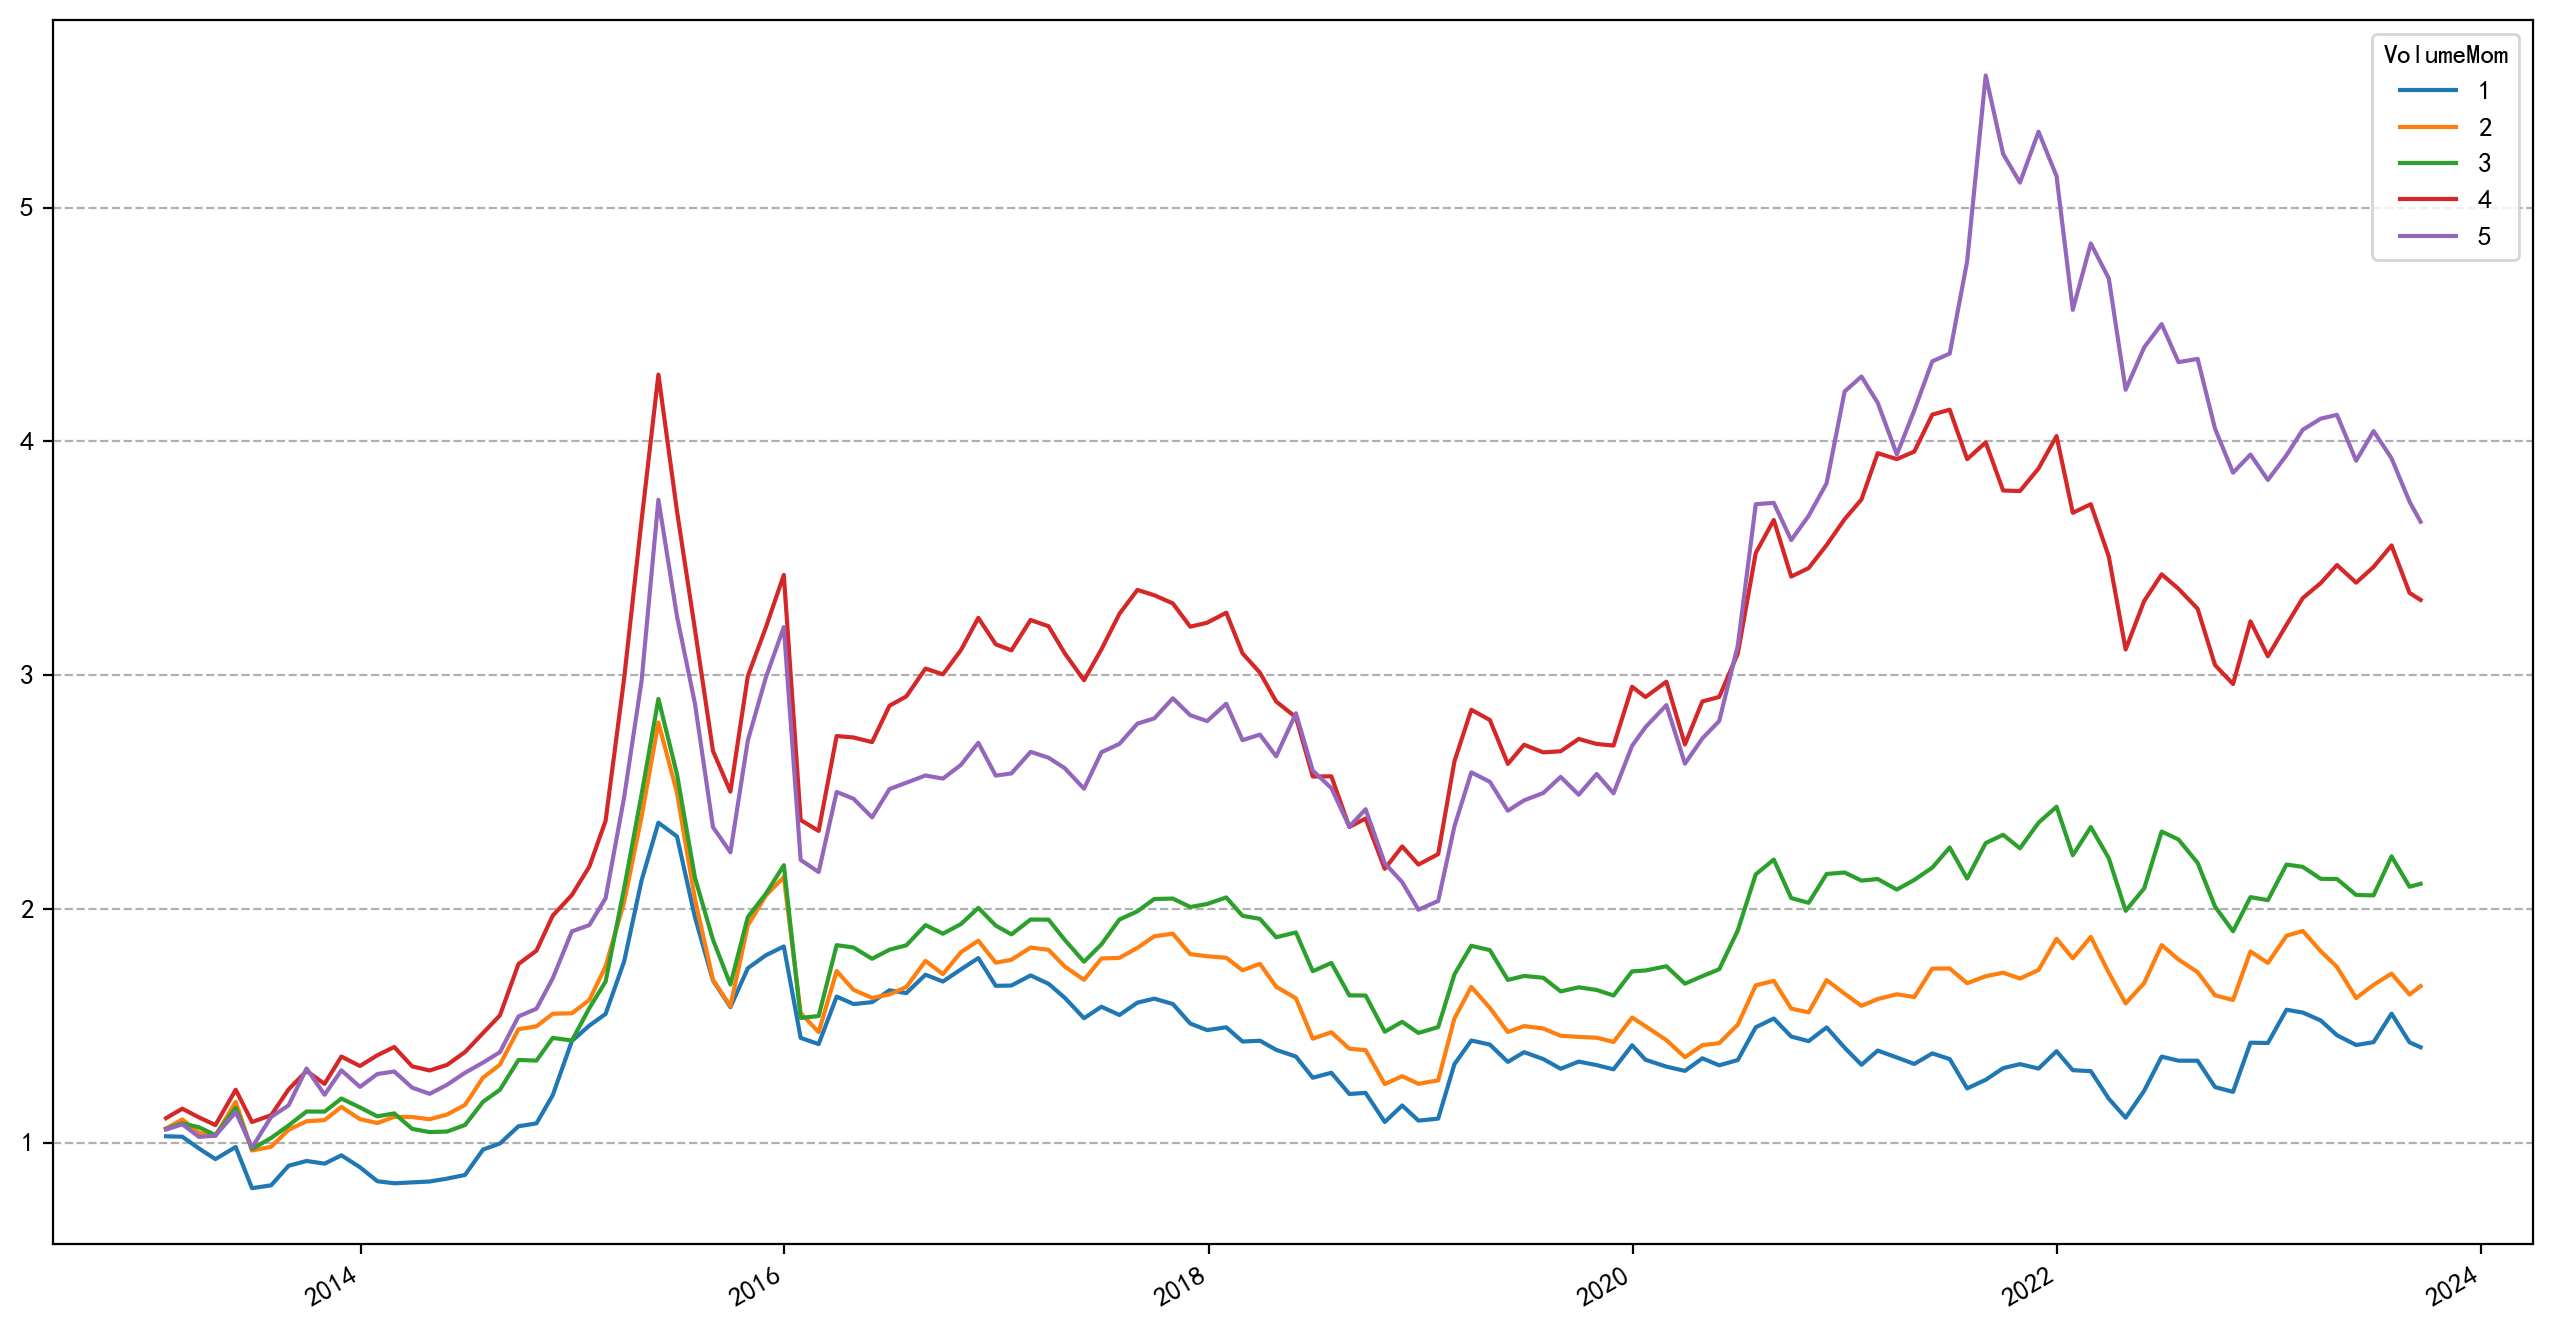

In [10]:
# fig, ax = plt.subplots(figsize = (16, 9), dpi = 200)
# pd.DataFrame(portfolio[:, 1:], columns = np.hstack(timestamp), index = ls.index).T.plot(ax =ax)
# ax.grid(axis = 'y', linestyle='--')

In [11]:
# N = 5
# fname = 'VolumeMom'
# start = 0
# last_trade_date = sorted(list(set(DataTable.index.levels[1])))
# data['年月'] = data['日期'].apply(lambda x: x.strftime('%Y%m'))
# mkt = data[['日期', '涨跌幅(%)', '简称', '年月']].set_index(['简称', '日期'])
# trade_month = sorted(list(set(data['年月'])))

# timestamp = list()
# portfolio = np.array([1] * N).reshape(N, 1)
# for i in range(29, len(last_trade_date) - 1):
#     factorData = DataTable.query('日期 == "' +  str(last_trade_date[i])  +  '"')[fname]
#     cutRes = pd.qcut(factorData, N, labels = np.arange(1, N + 1))
#     # 让 cutRes 变成代码为索引
#     cutRes.index = cutRes.index.droplevel(1)
#     # temp 的 index 为代码，columns 为时间
#     temp = (1 + mkt[['涨跌幅(%)']][mkt['年月'] == trade_month[i + 1]]/100).loc[cutRes.index]
#     temp = temp.unstack().cumprod(axis = 1)

#     # 广播 portfolio 最后一列的值
#     ls = temp.groupby(cutRes).mean() * portfolio[:, -1].reshape(N, 1)
#     portfolio = np.hstack((portfolio, ls.values))  
#     portfolio = pd.DataFrame(portfolio).fillna(method='pad', axis = 1)
#     portfolio = np.array(portfolio)
#     timestamp.append(ls.columns.droplevel(0))

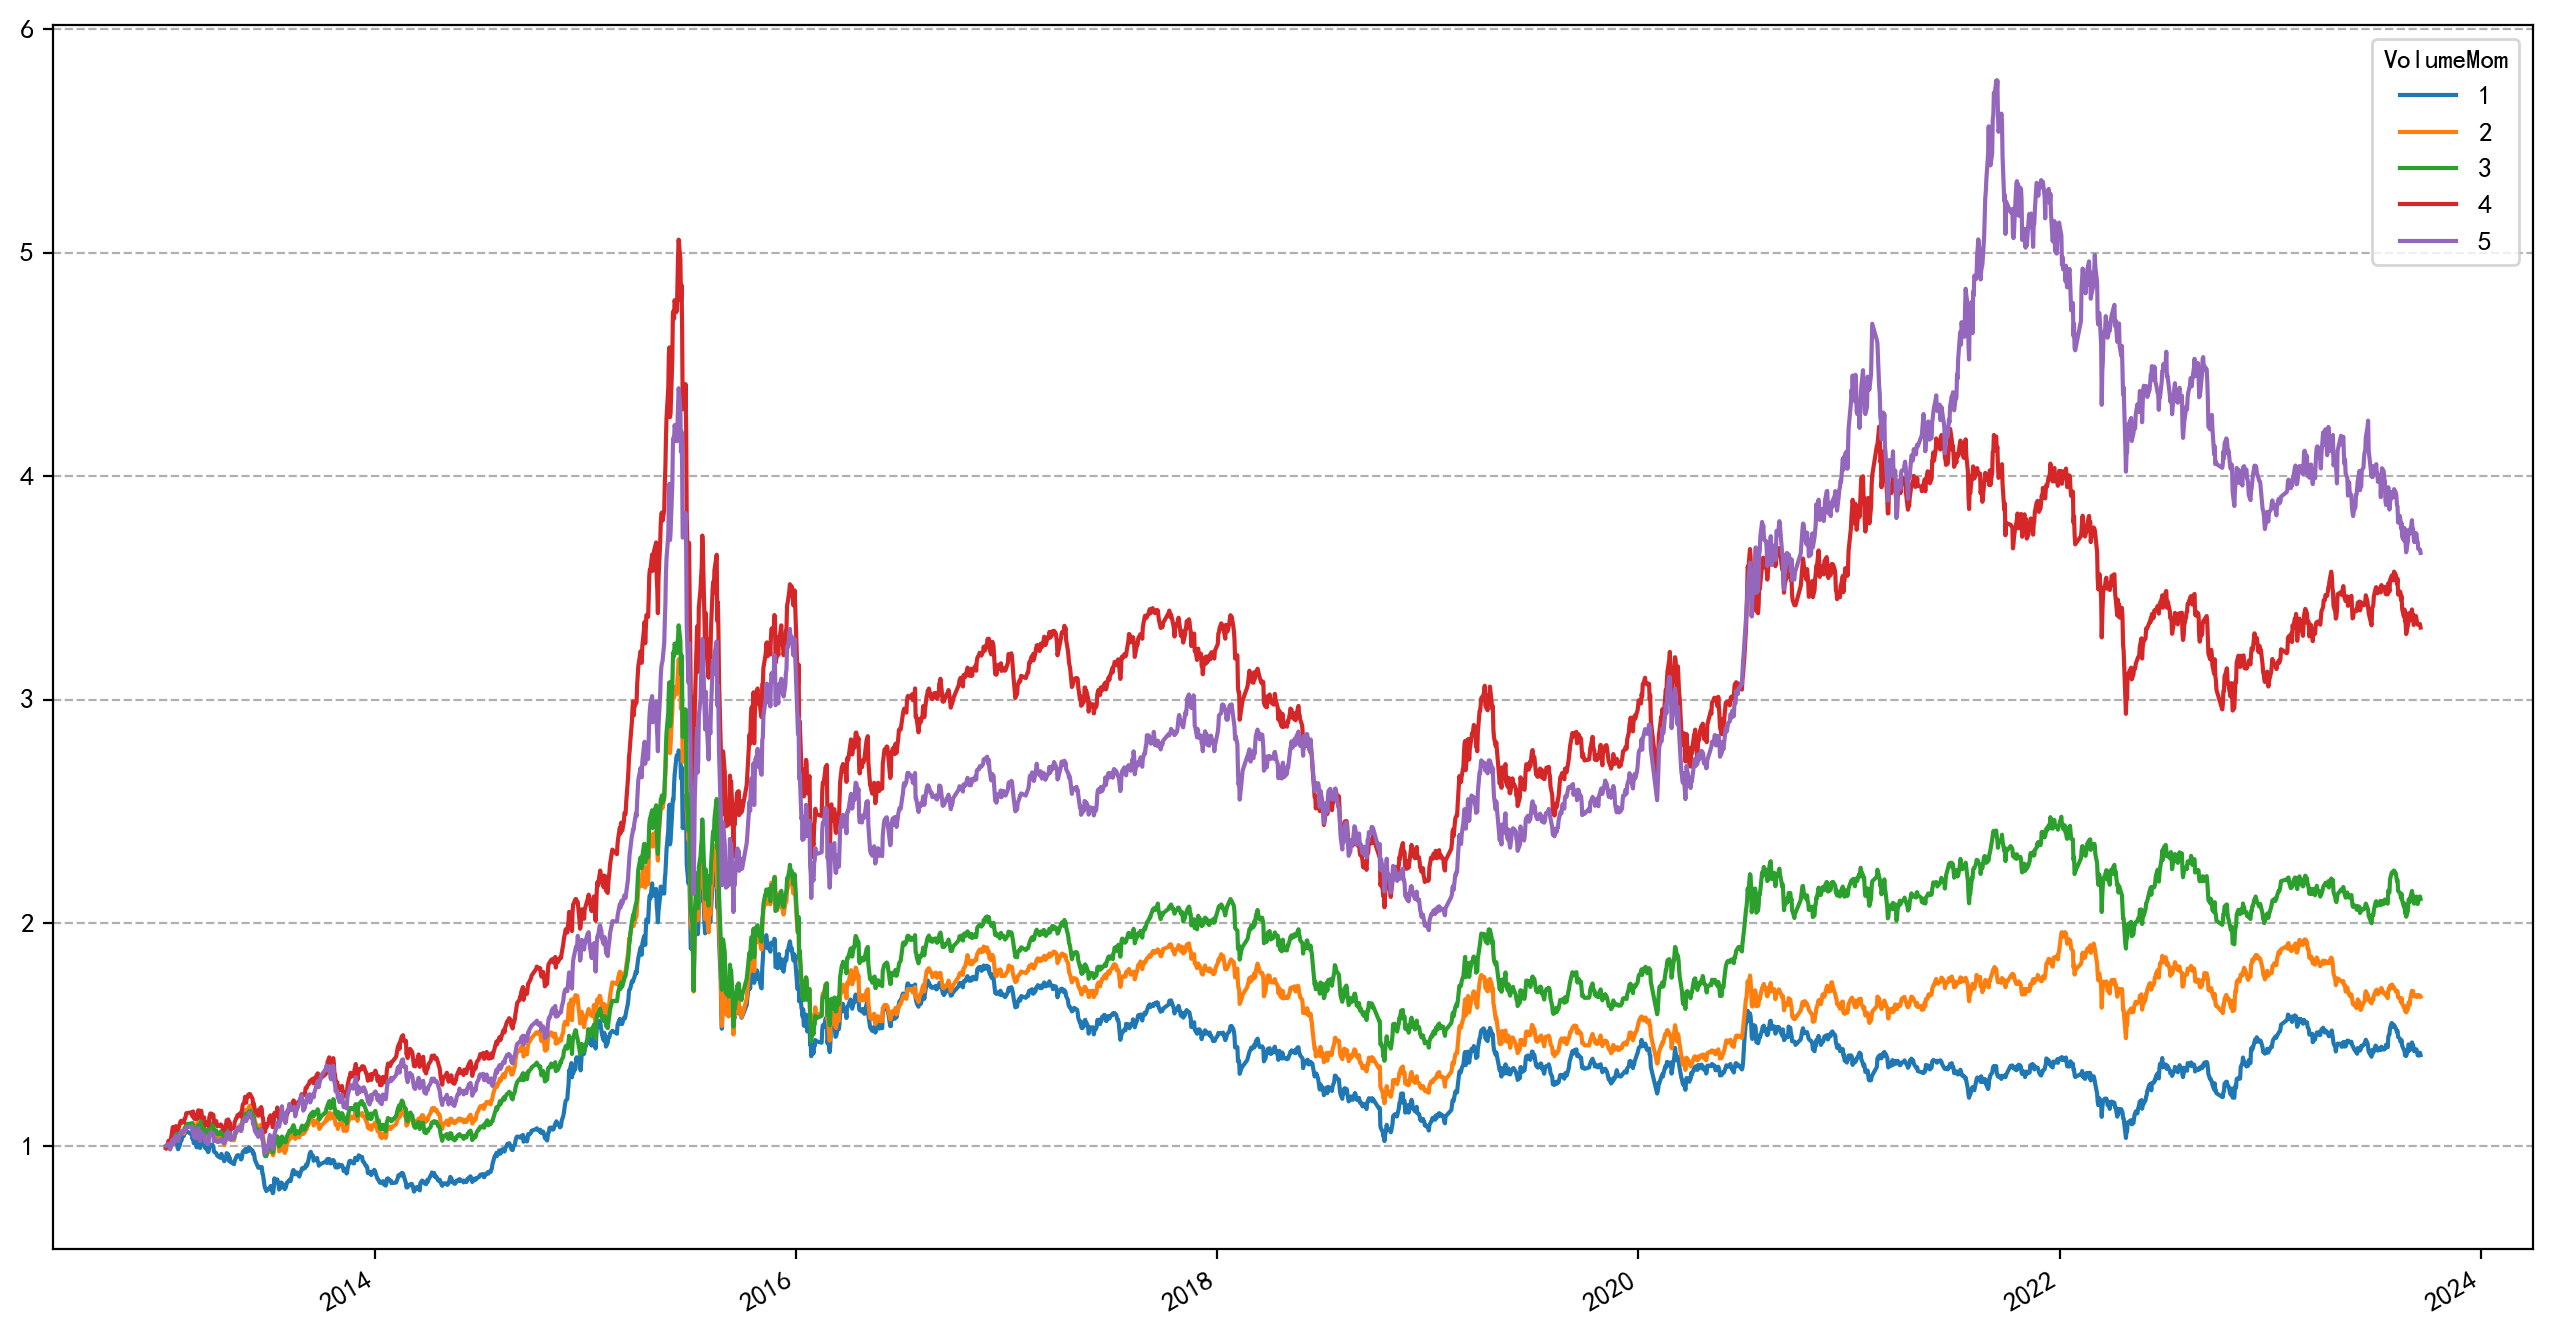

In [12]:
# fig, ax = plt.subplots(figsize = (16, 9), dpi = 200)
# pd.DataFrame(portfolio[:, 1:], columns = np.hstack(timestamp), index = ls.index).T.plot(ax =ax)
# ax.grid(axis = 'y', linestyle='--')